# This notebook performs EDA and services as a filter to select relevant features via high correlations

In [ ]:
'''
Feature selection
1. Macroeconomic factors: [tnote, tbill, Fed_rate, GDP, GDP_growth, CPI]
2. Financial factors: [Gross_Profit, ROE, ROI, P/E, P/S]
3. Market Factors: [Dow_Jones, SP500, Volumn]

'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from seaborn import set_style

In [2]:
set_style("whitegrid")

## Load data

In [21]:
pwd

'/Users/ziyuan/Library/CloudStorage/OneDrive-WashingtonUniversityinSt.Louis/Machine_Learning/Erdos_Bootcamp/Project/modeling/modeling'

In [38]:
apple_all_factor=pd.read_csv('../../Dataset/merge_data_all_factor.csv')

In [39]:
apple_all_factor["Date"] = pd.to_datetime(apple_all_factor["Date"])

In [40]:
apple_all_factor

,Date,Close,Volume,Dow_Jones,SP500,Gross_Profit,ROE,PE_ratio,PS_ratio,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,2012-11-12,19.386786,515802000,12815.08,1380.03,14401,0.40,12.93,3.45,1.61,0.18,0.16,16420.386,2.280688,231.249
1,2012-11-13,19.389286,532949200,12756.18,1374.53,14401,0.40,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249
2,2012-11-14,19.174286,477170400,12570.95,1355.49,14401,0.40,12.93,3.45,1.59,0.18,0.16,16420.386,2.280688,231.249
3,2012-11-15,18.772142,789910800,12542.38,1353.33,14401,0.40,12.93,3.45,1.58,0.17,0.16,16420.386,2.280688,231.249
4,2012-11-16,18.845715,1266893600,12588.31,1359.88,14401,0.40,12.93,3.45,1.58,0.16,0.16,16420.386,2.280688,231.249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,2022-11-18,151.289993,74794600,33745.69,3992.93,38095,1.61,22.58,5.74,3.82,4.74,3.83,25663.289,1.800000,298.062
2524,2022-11-21,148.009995,58724100,33700.28,3992.93,38095,1.61,22.58,5.74,3.83,4.75,3.83,25663.289,1.800000,298.062
2525,2022-11-22,150.179993,51804100,34098.10,3992.93,38095,1.61,22.58,5.74,3.76,4.79,3.83,25663.289,1.800000,298.062
2526,2022-11-23,151.070007,58301400,34194.06,3992.93,38095,1.61,22.58,5.74,3.71,4.75,3.83,25663.289,1.800000,298.062


## Macro

In [25]:
apple_macro = apple_all_factor[['Close','tnote','tbill','Fed_rate','GDP','GDP_growth','CPI']]
apple_macro.head(3)

,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
0,19.386786,1.61,0.18,0.16,16420.386,2.280688,231.249
1,19.389286,1.59,0.18,0.16,16420.386,2.280688,231.249
2,19.174286,1.59,0.18,0.16,16420.386,2.280688,231.249


In [26]:
apple_macro.corr()

,Close,tnote,tbill,Fed_rate,GDP,GDP_growth,CPI
Close,1.000000,-0.213176,0.220986,0.081751,0.918565,0.052077,0.936496
tnote,-0.213176,1.000000,0.616322,0.508438,-0.026555,0.349736,0.012370
tbill,0.220986,0.616322,1.000000,0.937938,0.523791,0.042414,0.507267
Fed_rate,0.081751,0.508438,0.937938,1.000000,0.413918,0.029707,0.363107
GDP,0.918565,-0.026555,0.523791,0.413918,1.000000,0.094987,0.978524
GDP_growth,0.052077,0.349736,0.042414,0.029707,0.094987,1.000000,0.042329
CPI,0.936496,0.012370,0.507267,0.363107,0.978524,0.042329,1.000000


<AxesSubplot:>

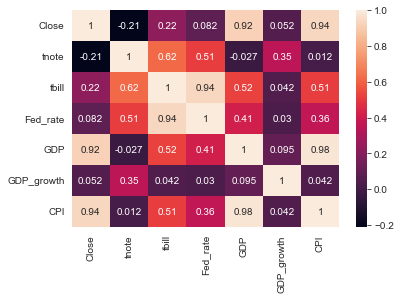

In [27]:
sns.heatmap(apple_macro.corr(), annot=True)

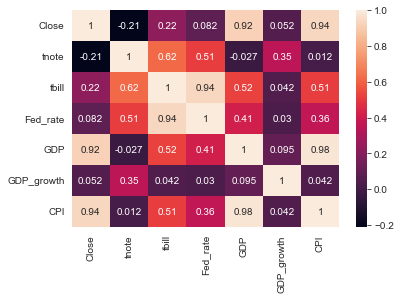

In [49]:
apple_macro_heatmap = sns.heatmap(apple_macro.corr(), annot=True)

In [51]:
apple_macro_heatmap.figure.savefig("output.png")

### GDP and CPI are the highly correlated features

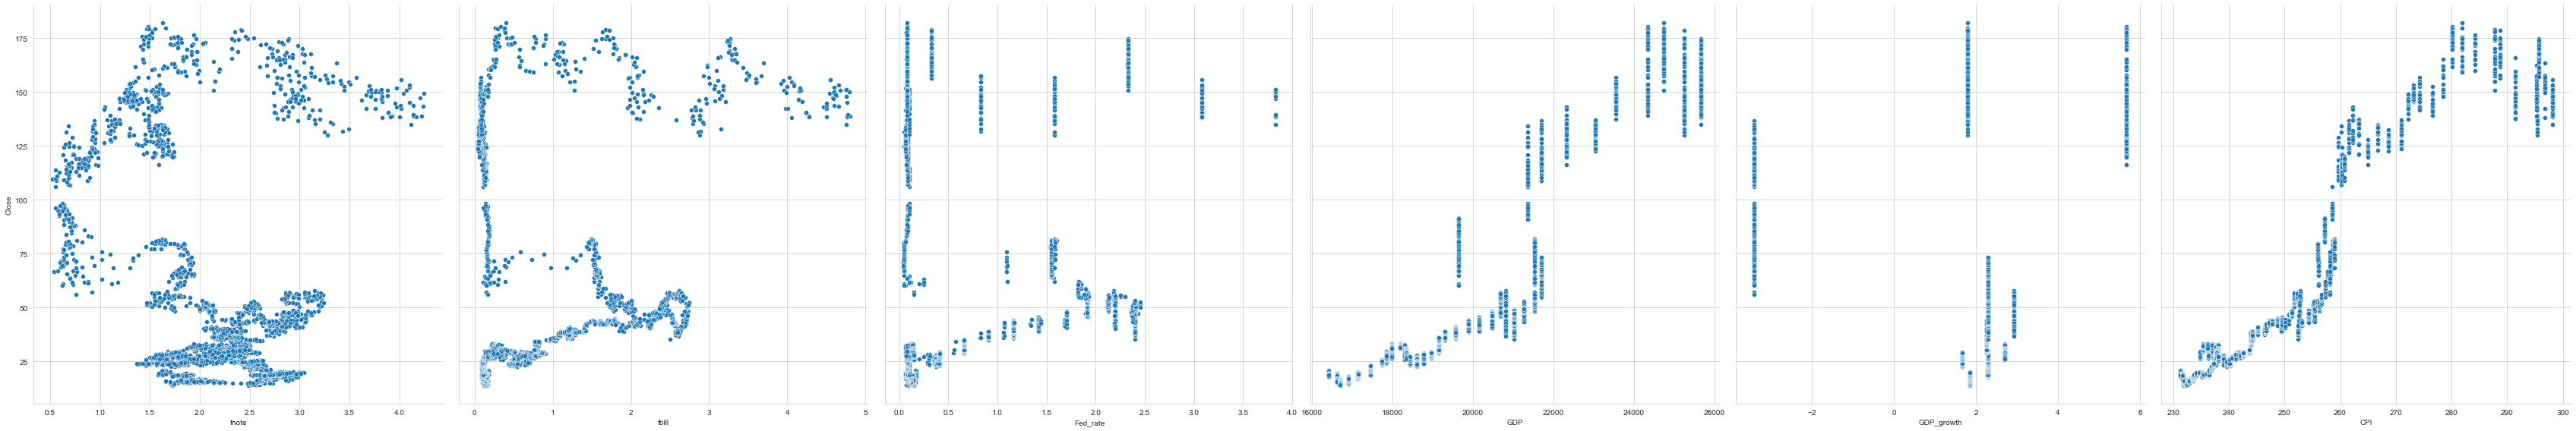

In [15]:
sns.pairplot(apple_macro,
                y_vars = ['Close'],
                x_vars = ['tnote','tbill','Fed_rate','GDP','GDP_growth','CPI'],
                height = 8)

plt.show()

## Financial

In [29]:
apple_fin = apple_all_factor[['Close','Gross_Profit', 'ROE', 'PE_ratio', 'PS_ratio']]
apple_fin.head(3)

,Close,Gross_Profit,ROE,PE_ratio,PS_ratio
0,19.386786,14401,0.4,12.93,3.45
1,19.389286,14401,0.4,12.93,3.45
2,19.174286,14401,0.4,12.93,3.45


In [30]:
apple_fin.corr()

,Close,Gross_Profit,ROE,PE_ratio,PS_ratio
Close,1.000000,0.788735,0.952725,0.891689,0.950138
Gross_Profit,0.788735,1.000000,0.790629,0.706665,0.778503
ROE,0.952725,0.790629,1.000000,0.752388,0.862466
PE_ratio,0.891689,0.706665,0.752388,1.000000,0.976528
PS_ratio,0.950138,0.778503,0.862466,0.976528,1.000000


<AxesSubplot:>

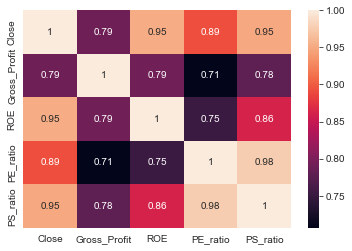

In [32]:
sns.heatmap(apple_fin.corr(), annot=True)

### All are the highly correlated features

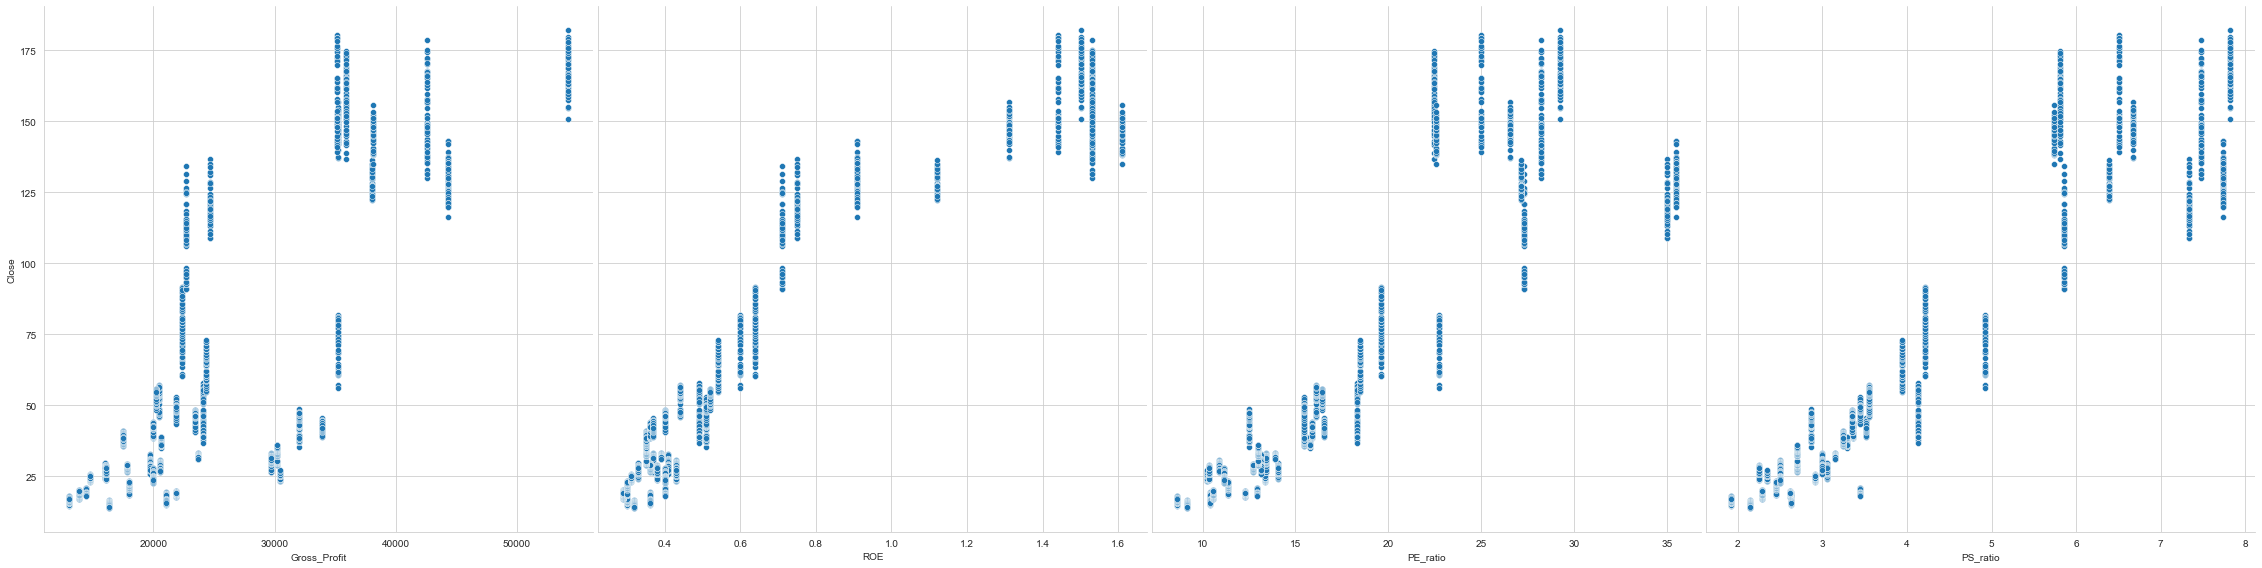

In [34]:
sns.pairplot(apple_fin,
                y_vars = ['Close'],
                x_vars = ['Gross_Profit', 'ROE', 'PE_ratio', 'PS_ratio'],
                height = 8)

plt.show()

## Market

In [41]:
apple_market = apple_all_factor[['Close','Volume', 'Dow_Jones','SP500']]
apple_market.head(3)

,Close,Volume,Dow_Jones,SP500
0,19.386786,515802000,12815.08,1380.03
1,19.389286,532949200,12756.18,1374.53
2,19.174286,477170400,12570.95,1355.49


In [42]:
apple_market.corr()

,Close,Volume,Dow_Jones,SP500
Close,1.000000,-0.435932,0.919591,0.960925
Volume,-0.435932,1.000000,-0.579613,-0.557548
Dow_Jones,0.919591,-0.579613,1.000000,0.987659
SP500,0.960925,-0.557548,0.987659,1.000000


<AxesSubplot:>

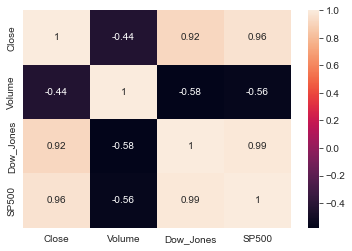

In [43]:
sns.heatmap(apple_market.corr(), annot=True)

### DJ and SP500 are the highly correlated features

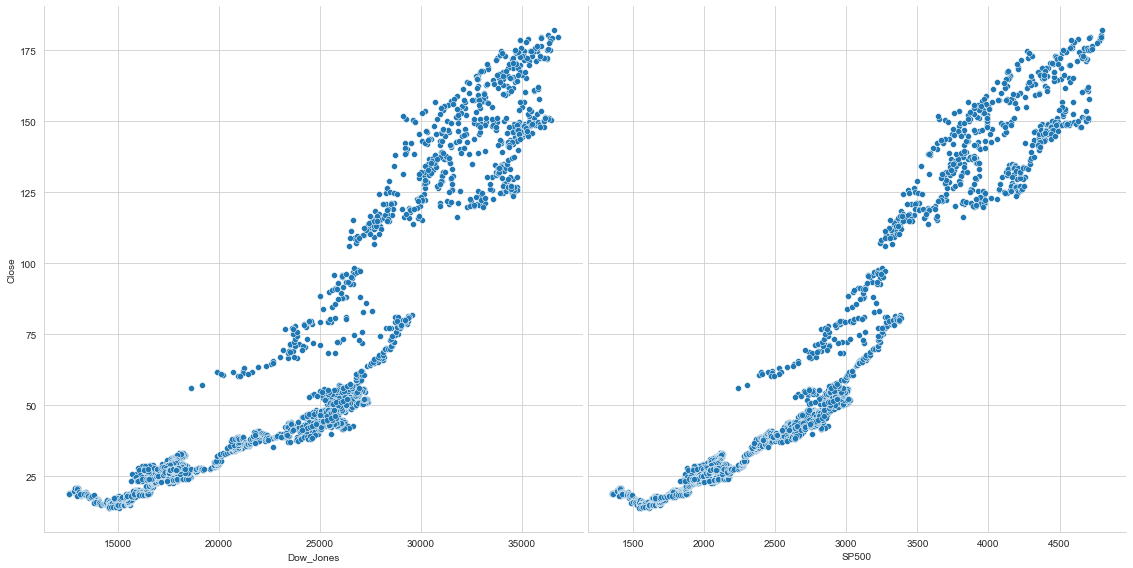

In [47]:
sns.pairplot(apple_market,
                y_vars = ['Close'],
                x_vars = ['Dow_Jones','SP500'],
                height = 8)

plt.show()

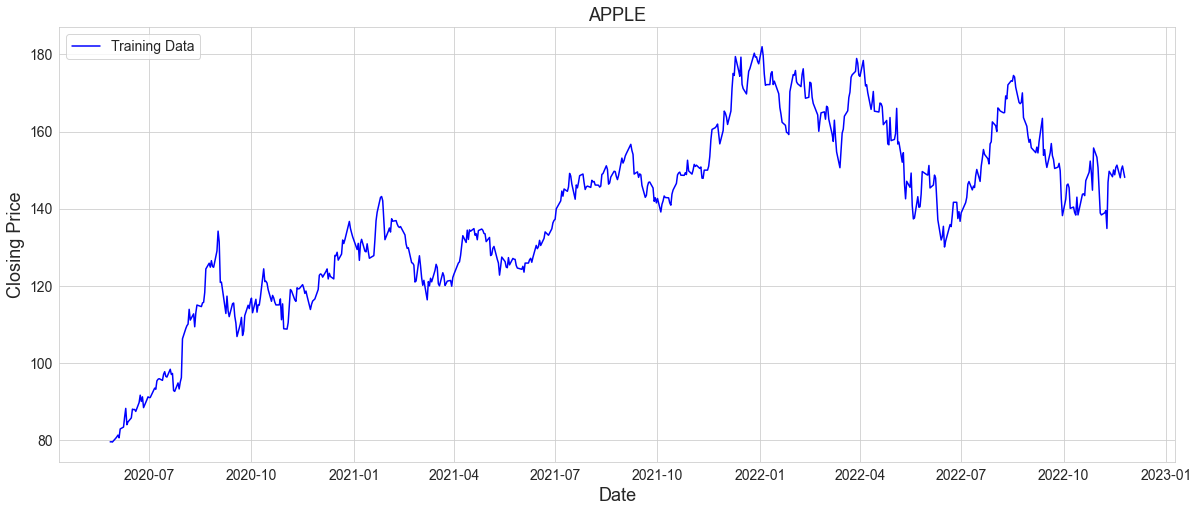

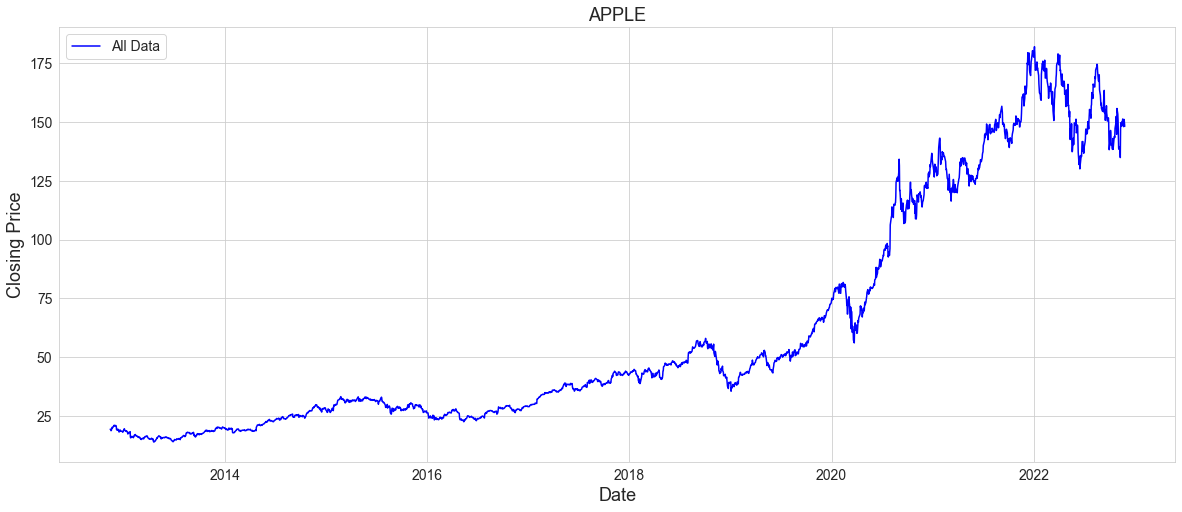

In [45]:
plt.figure(figsize=(20,8))

ratio=0.75
num_of_test=int(ratio*len(apple_all_factor))

plt.plot(apple_all_factor.Date[num_of_test:], 
         apple_all_factor.Close[num_of_test:],
         'b',
         label="Training Data")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title('APPLE', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()


plt.figure(figsize=(20,8))

plt.plot(apple_all_factor.Date[:], 
         apple_all_factor.Close[:],
         'b',
         label="All Data")

plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.title('APPLE', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14, loc=2)

plt.show()